# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Output: Number of predicted wins (W)

# Attribute Information

W -- WIN (Target Variable)

R -- Runs

AB -- At Bats

H -- Hits

2B -- Doubles

3B -- Triples

HR -- Homeruns

BB -- Walks

SO -- Strikeouts

SB -- Stolen Bases

RA -- Runs Allowed

ER -- Earned Runs

ERA -- Earned Run Average

SHO -- Shutouts

SV -- Saves

E -- Errors

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#Checking Shape
df.shape

(30, 17)

Our dataset have 30 rows and 17 attributes including target attribute W(Wins).

This Is regression Problem Statement because target is in numerical/integer format.

In [5]:
#Checking Datatype
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the attributes are 'Int64' data type except ERA which is of 'float64' data type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
## Checcking Null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
#Getting Statistical Summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can infer from this that Most of attributes data are normally distributed.

In some attributes such as 'H','HR', Mean value is greater than Median value which means data is right skewed in Nature.

We can observe from the above table that for most of attributes Mean and Median (50%) is approximatly same.

It seems from above table that possiblity of outliers are very less in our dataset.

# Data Visualization

In [9]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'NUll Values Heatmap'}>

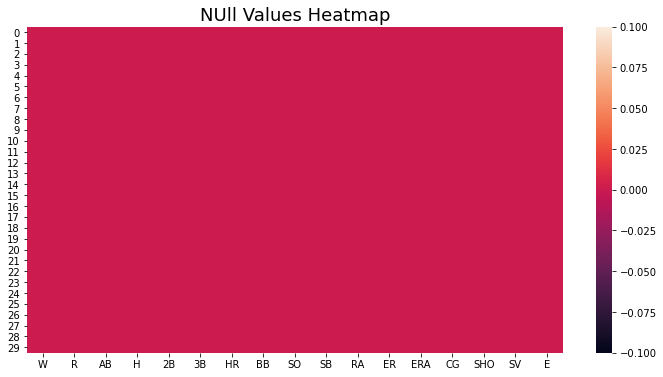

In [10]:
plt.figure(figsize=(12,6))
plt.title('NUll Values Heatmap',fontsize=18)
sns.heatmap(df.isnull())

As we know there are no  Null Values

## Checking Correlation

<AxesSubplot:title={'center':'Correlation Heat Map'}>

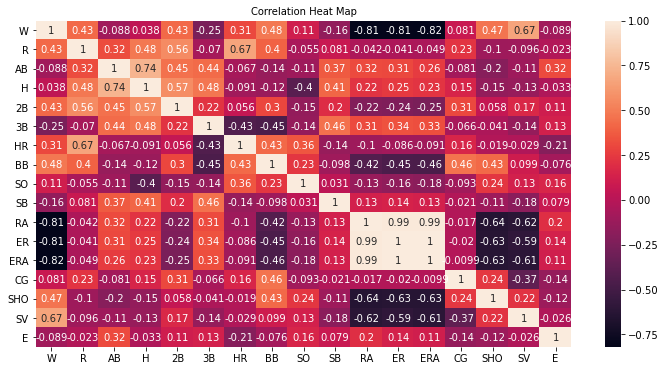

In [11]:
plt.figure(figsize=(12,6))
plt.title('Correlation Heat Map',fontsize=10)
sns.heatmap(df.corr(),annot=True)

In [12]:
corr=df.corr()
corr['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with Target'}>

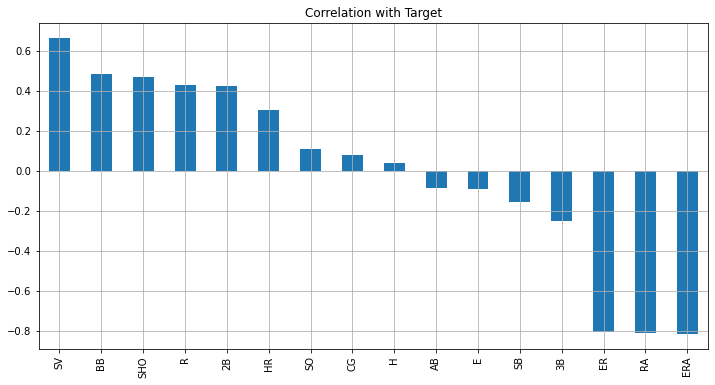

In [13]:
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot.bar(figsize=(12,6),grid=True,title='Correlation with Target',fontsize=10)

From Abovr Graph and data we can say that

SV,BB,SHO,R,2B,HR,SO,CG,H are Positively Correlated.
    
AB,E,SB,3B,ER,RA,ERA are Negetively Correlated   

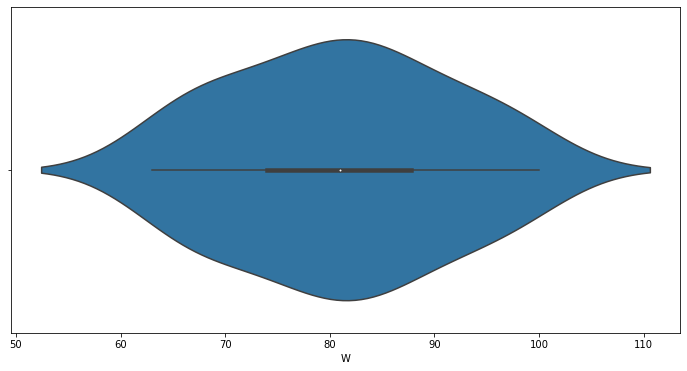

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(df['W'],scale='count')
plt.show()

We can see that most of the team able to win 80-90 games

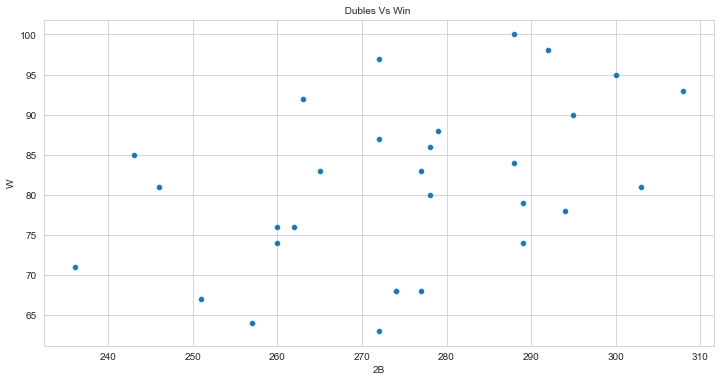

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title(' Dubles Vs Win  ',fontsize=10)
sns.scatterplot(df['2B'],df['W'],data=df,y_jitter=True)
plt.show()

There is some positive linear relation we can see here in this plot.

if any team take more double in the match/Tournament , the number of winning games inreases.

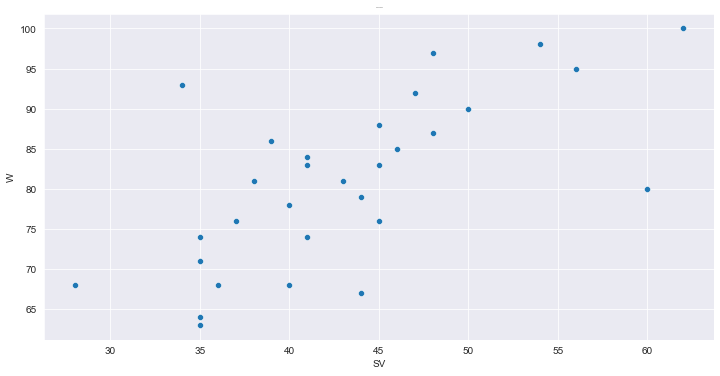

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Saves Vs Wins ',fontsize=1)
sns.scatterplot(df['SV'],df['W'],data=df)
plt.show()

From above scater plot it shows as Number of saves increase the Game winning Chances(numbers) also get increase.

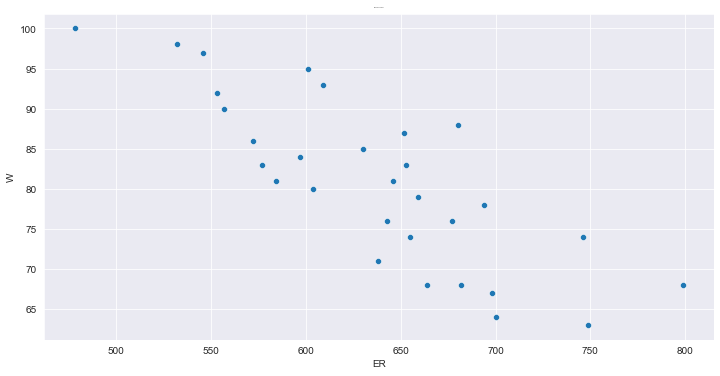

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Earned Runs Vs Wins  ',fontsize=1)
sns.scatterplot(df['ER'],df['W'],data=df,y_jitter=True)
plt.show()

We get a trend of datapoints which shows a negative slope.
A Earned Runes increases the number of winnings games decreases.
Inverse relationship between ER and Winning Numbers.

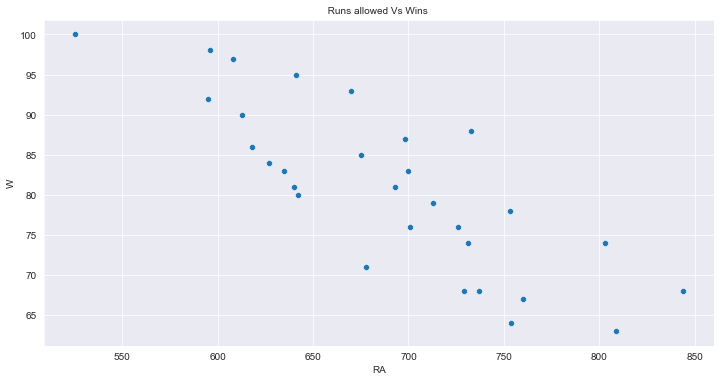

In [18]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(' Runs allowed Vs Wins  ',fontsize=10)
sns.scatterplot(df['RA'],df['W'],data=df,y_jitter=True)
plt.show()


As Runs allowed increases we can see that the number of wininigs are getting less.

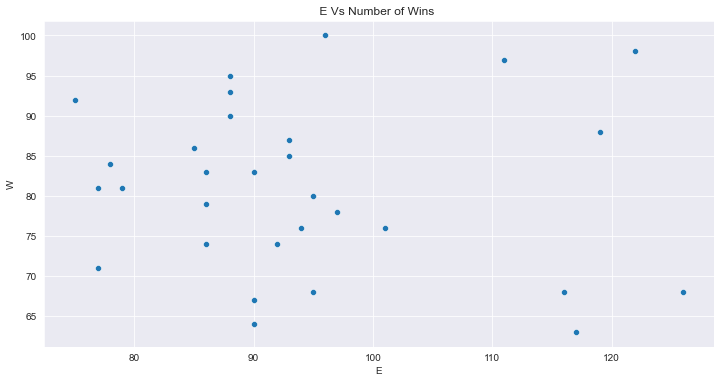

In [19]:
plt.figure(figsize=(12,6))
plt.title(' E Vs Number of Wins  ',fontsize=12)
sns.scatterplot(df['E'],df['W'],data=df,y_jitter=True)
plt.show()

This sctter plots contains data all over graph.So cant understand that

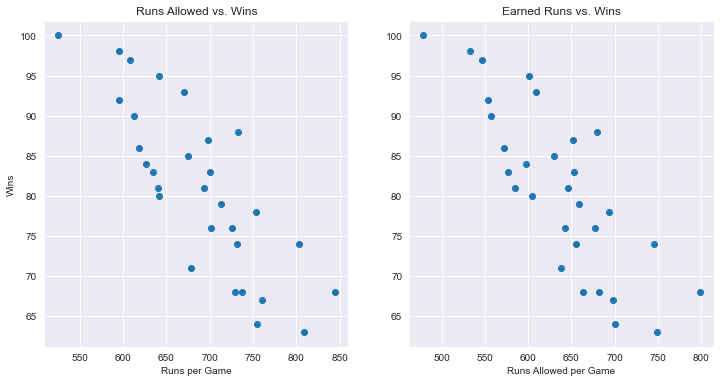

In [20]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['RA'], df['W'])
ax1.set_title('Runs Allowed vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['ER'], df['W'])
ax2.set_title('Earned Runs vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

We can see that Runs Allowed and Earned Runs should be less inorder to be a winner

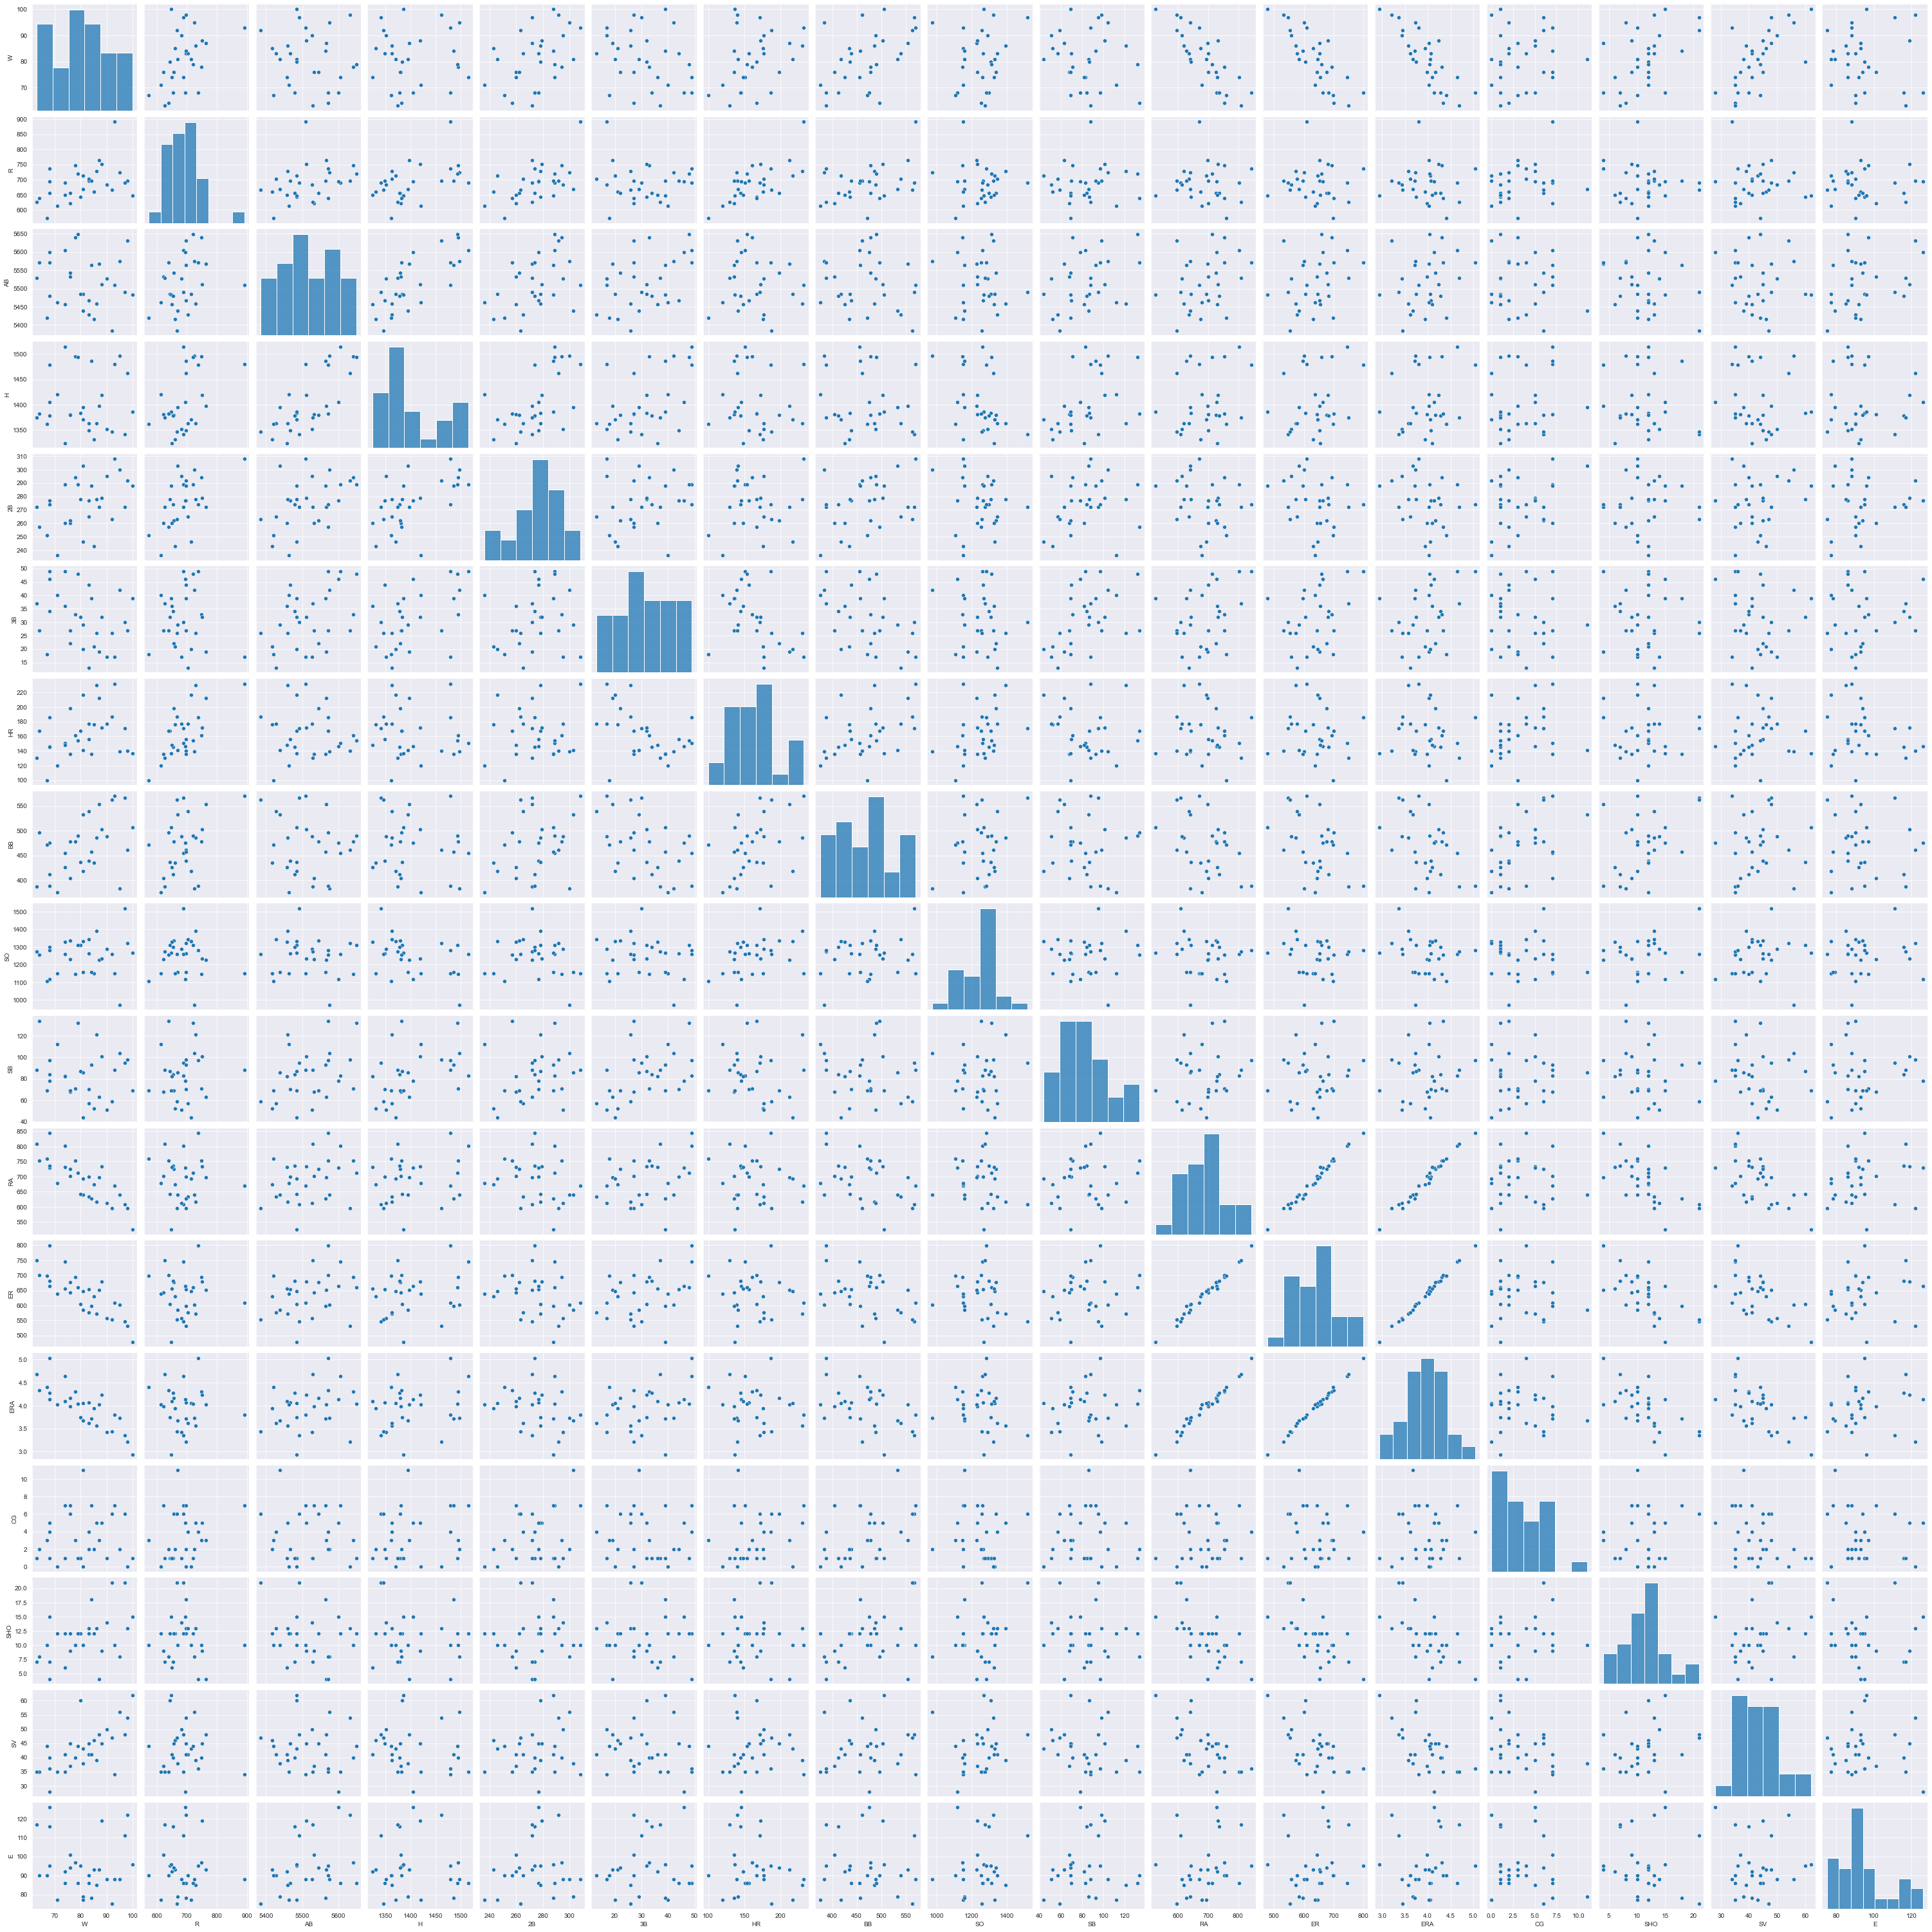

In [21]:
sns.pairplot(df)

# Checking Data Distribution

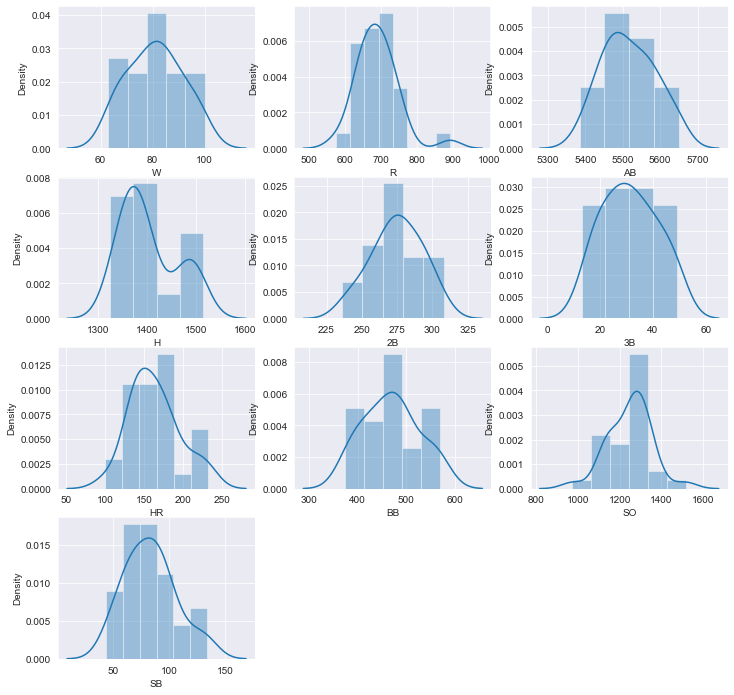

In [22]:
plt.figure(figsize=(12,12))
plot=1
for col in df:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()


All Data Are Normally Distributed

# Checking Outliers

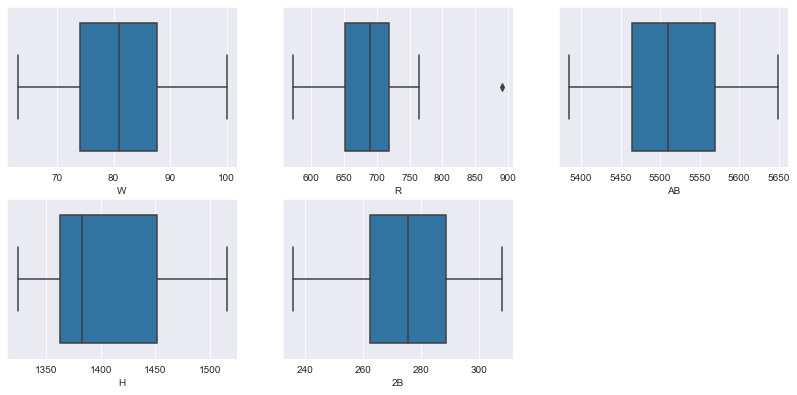

In [23]:
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

One Column Has Outlier.So we have to treat outlier.

In [24]:
#Outlier Removal
from scipy.stats import zscore
z =np.abs(zscore(df))
print(z.shape)
df_new = df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(30, 17)
(29, 17)


# Checking Skewness

In [25]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [26]:
for i in df_new:
    if df_new[i].skew()>=.55:
        df_new[i]=np.log1p(df_new[i])

In [27]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

Skewness removed

# Splitting data into Input and Output Variable

In [28]:
x=df_new.drop(['W'],axis=1)
y=df_new[['W']]

# Scaling Input Data

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.813262,1.554812,-0.435733
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.159299,0.296229,-0.598110
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.326982,-0.672787,-1.197382
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.570122,-0.825263,0.538291
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.159299,-1.142637,-0.598110
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-1.785822,0.667088,-0.045239
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.326982,0.035297,-1.378259
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.159299,1.952930,0.105172
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.326982,-0.379227,0.252482
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.570122,0.296229,1.699369


# Checking Feature Importance 

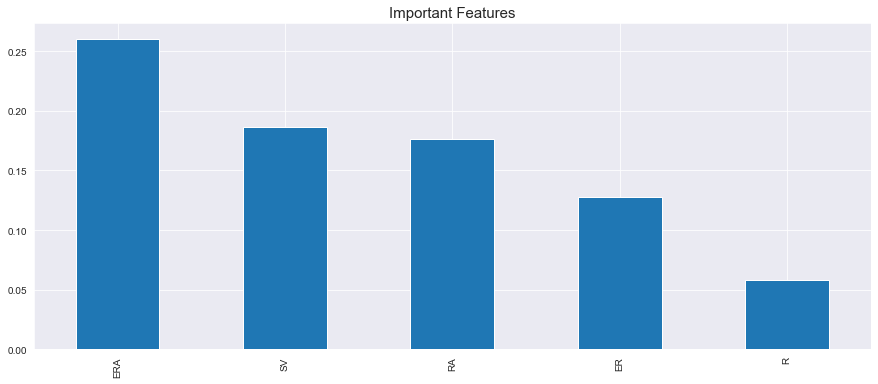

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
er=ExtraTreesRegressor()
er.fit(x,y)

plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(er.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='bar')
plt.show()

As we can see that RA, ERA, SV are most Important Feature.

# Model Buidling

In [31]:
#Importing Libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [32]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r

In [33]:
#LIinear Regression
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 73 is 0.8507709590470471


cross validation score 0.04078645834638232


Standard Deviation 0.44737734920591693


Training accuracy 0.9632661736539144


Test Accuracy 0.849090110876999


MAE 4.442997113976799


MSE 23.022141973986706


RMSE 4.798139428360404


73

In [34]:
#Lasso
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 82 is 0.9569861780928952


cross validation score 0.49033824821340977


Standard Deviation 0.6002031960611405


Training accuracy 0.8596965906875517


Test Accuracy 0.8752922811726905


MAE 3.810352441874779


MSE 19.024855327766215


RMSE 4.361749113345037


82

In [35]:
#Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 75 is 0.9656470425613889


cross validation score 0.3917445799642074


Standard Deviation 0.6838140520964888


Training accuracy 0.9326037702056971


Test Accuracy 0.9196126869876206


MAE 3.0388280178362983


MSE 12.263531196221889


RMSE 3.5019324945266845


75

In [36]:
#Decision Tree
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 97 is 0.8083716428744254


cross validation score -2.1074094776084755


Standard Deviation 4.011124602126238


Training accuracy 1.0


Test Accuracy 0.4056809905316824


MAE 8.666666666666666


MSE 90.66666666666667


RMSE 9.521904571390467


97

In [37]:
#KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 51 is 0.7973065326633166


cross validation score 0.027111560669320613


Standard Deviation 0.7888810870744435


Training accuracy 0.6182682583105364


Test Accuracy 0.6643408594319009


MAE 6.633333333333333


MSE 51.20666666666668


RMSE 7.1558833603313206


51

In [38]:
#SVm
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 54 is 0.22178358793156283


cross validation score -0.2972022350274798


Standard Deviation 0.49177877863138775


Training accuracy 0.21985396844426774


Test Accuracy 0.15457624455188335


MAE 9.978375554568848


MSE 128.97409069225156


RMSE 11.356676040649022


54

In [39]:
#random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 46 is 0.8080778437642758


cross validation score -0.6662876905204137


Standard Deviation 2.388833765400803


Training accuracy 0.9261204364585924


Test Accuracy 0.6533397305171156


MAE 6.275000000000001


MSE 52.884950000000025


RMSE 7.272203930033867


46

In [40]:
#AdaBoost
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,x,y)

max r2 score corresponding to 46 is 0.9079802201502063


cross validation score 0.2100124440590363


Standard Deviation 0.54431716668356


Training accuracy 0.710695230326845


Test Accuracy 0.47706639461076783


MAE 8.240497468968256


MSE 79.77642668882396


RMSE 8.931765037708054


46

In [41]:
#Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

max r2 score corresponding to 47 is 0.8327327417248128


cross validation score -1.3520720993467035


Standard Deviation 3.7838011916968965


Training accuracy 0.9999998270821823


Test Accuracy 0.7185902420976829


MAE 5.675288918214055


MSE 42.930621955542385


RMSE 6.552146362493926


47

As we can see that In all those models Ridge Regressor performs well in the basis of Test Accuracy and Trainning Accuracy

# Hyperparameter Tuning

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=.20)
ridge=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1],'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
glf=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'alpha': 1, 'solver': 'svd'}

In [43]:
ridge_new=Ridge(alpha=1,solver='svd')
ridge_new.fit(x_train,y_train)
pred=ridge_new.predict(x_test)
print('Training accuracy',ridge_new.score(x_train,y_train))
print('\n')
print('Test Accuracy',ridge_new.score(x_test,y_test))
print('\n')

print('Error:')
print('MAE',mean_absolute_error(y_test,pred))
print('\n')
print('MSE',mean_squared_error(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 score',r2_score(pred,y_test))

Training accuracy 0.9179210449221076


Test Accuracy 0.9656470425613889


Error:
MAE 1.717957231883311


MSE 4.642420498301201


RMSE 2.154627693663386


R2 score 0.9662212521645058


Aur Accuracy score Improved to 96.56


# Saving The Best Model

In [44]:
import joblib
joblib.dump(ridge_new,'Baseball_Model.pkl')

['Baseball_Model.pkl']